In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:\Datatrained final Projects\Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

So this doesn't have missing values only _c39 has so we will remove it it because this column doesn't contain any information  we will also check isnull to confirm

In [5]:
df.drop("_c39",axis=1,inplace=True)

In [6]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [7]:
df.shape

(1000, 39)

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


<AxesSubplot:ylabel='fraud_reported'>

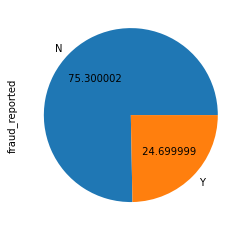

In [9]:
df["fraud_reported"].value_counts().plot(kind='pie',autopct='% 2f')

In [10]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

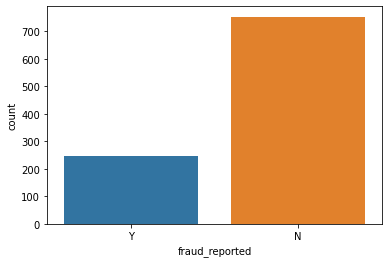

In [11]:
sns.countplot(df["fraud_reported"])

So this is imbalanced dataset We will treate it using SMOTE technique 

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

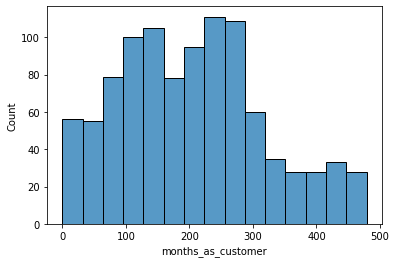

In [12]:
sns.histplot(df["months_as_customer"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

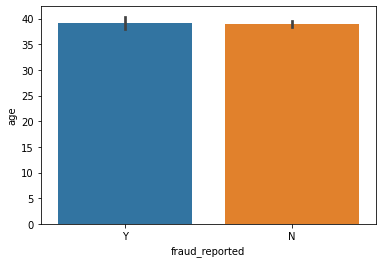

In [14]:
sns.barplot(x=df["fraud_reported"],y=df["age"])

In [15]:
df["policy_number"]

0      521585
1      342868
2      687698
3      227811
4      367455
        ...  
995    941851
996    186934
997    918516
998    533940
999    556080
Name: policy_number, Length: 1000, dtype: int64

This policy number is not an important column

<AxesSubplot:xlabel='policy_state', ylabel='count'>

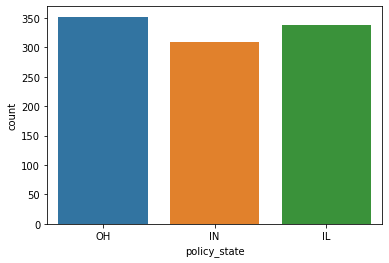

In [16]:
sns.countplot(df["policy_state"])

There are three types of States OH,IL,IL

<AxesSubplot:xlabel='policy_state', ylabel='count'>

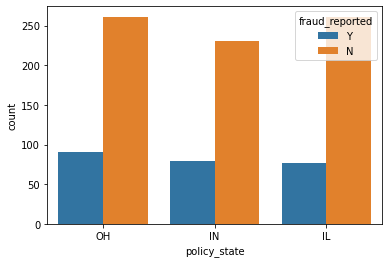

In [17]:
sns.countplot(df["policy_state"],hue=df["fraud_reported"])

With this graph we can't get any clarity since all are cities are almost equal 

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

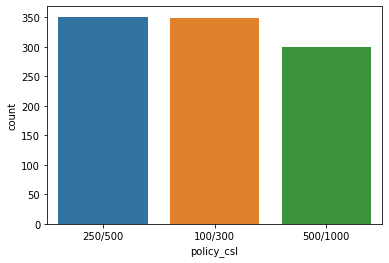

In [18]:
sns.countplot(df["policy_csl"])

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

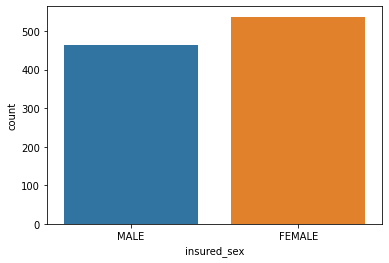

In [19]:
sns.countplot(df["insured_sex"])

So most the insured people are Female 

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

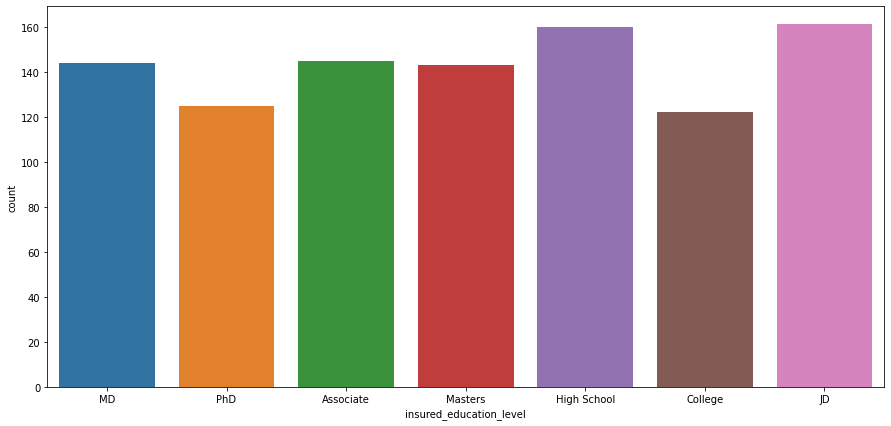

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(df["insured_education_level"])

So there are various education level of the insured persons like MD, PHD, Associate,Masters,High School, College JD  

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

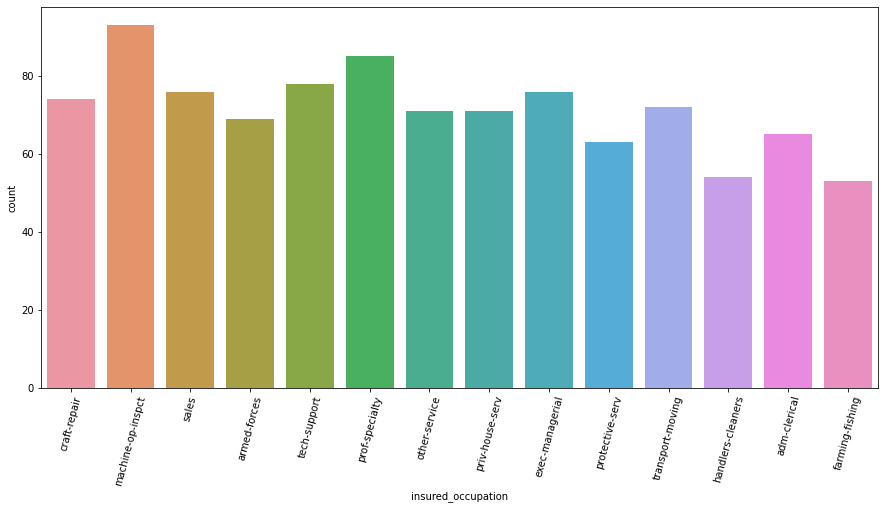

In [21]:

plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["insured_occupation"])

So most the people who are insured has the occupration machine op inspct

<AxesSubplot:xlabel='incident_type', ylabel='count'>

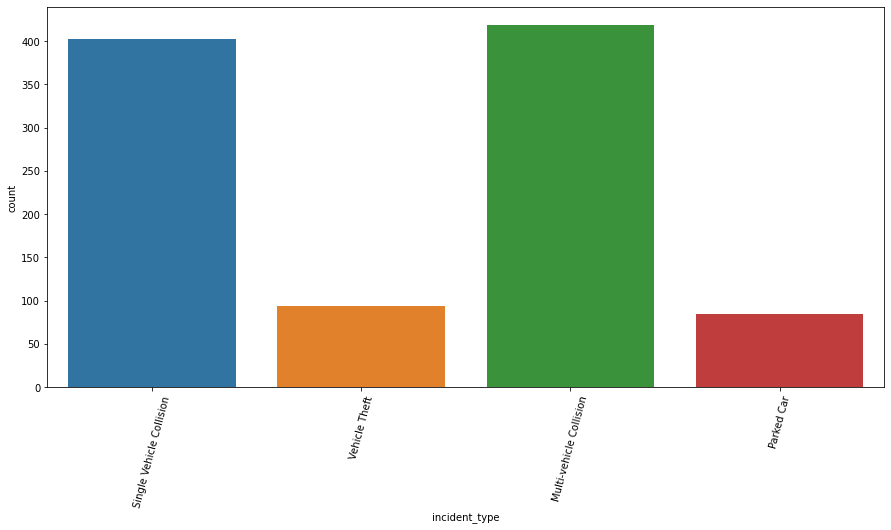

In [22]:

plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["incident_type"])

So most of incident type are single and multi vechile Collision

<AxesSubplot:xlabel='incident_type', ylabel='count'>

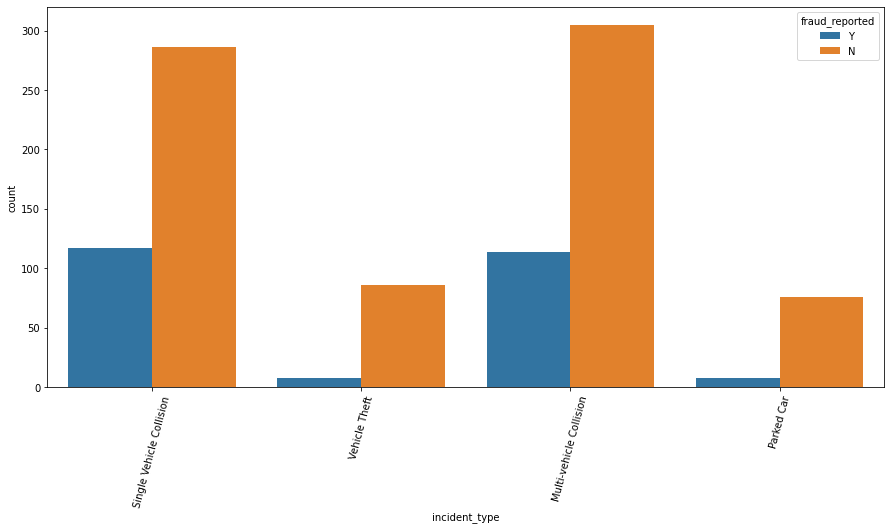

In [23]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["incident_type"],hue=df["fraud_reported"])

So most of the fraud report where are Single and Multi vechile collision

<AxesSubplot:xlabel='collision_type', ylabel='count'>

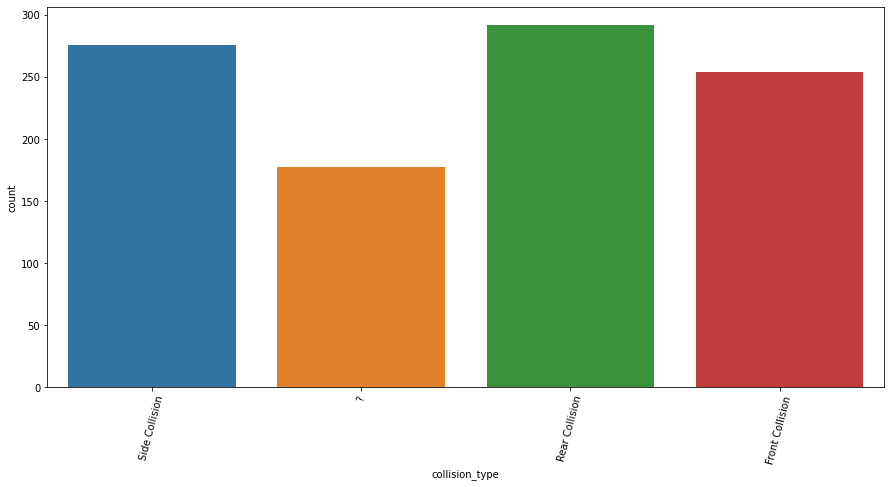

In [24]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["collision_type"])

this above graph shows that ? is also there so we will treate it 

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

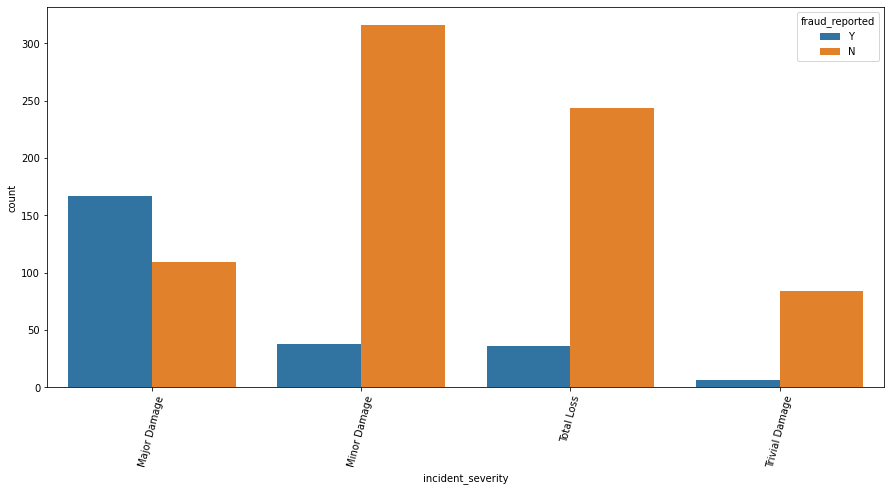

In [25]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["incident_severity"],hue=df["fraud_reported"])

In this graph we can see that in majaor damage fraud reported  is more

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

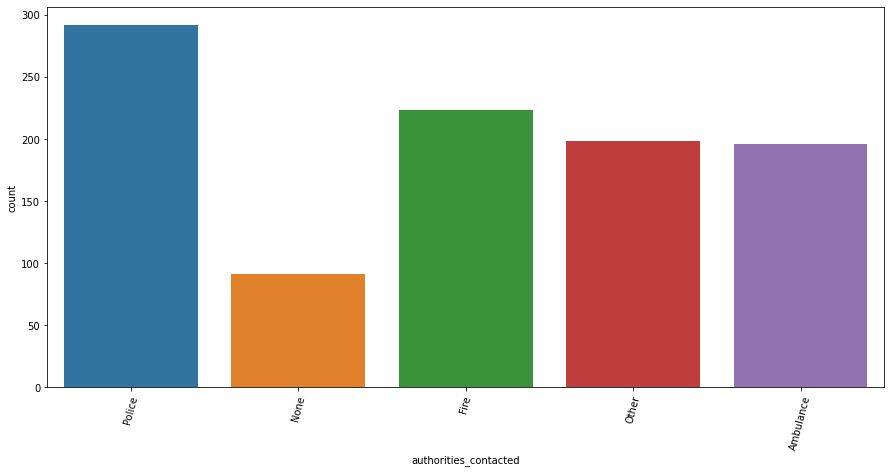

In [26]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["authorities_contacted"])

So after the incident Police was contacted more 

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

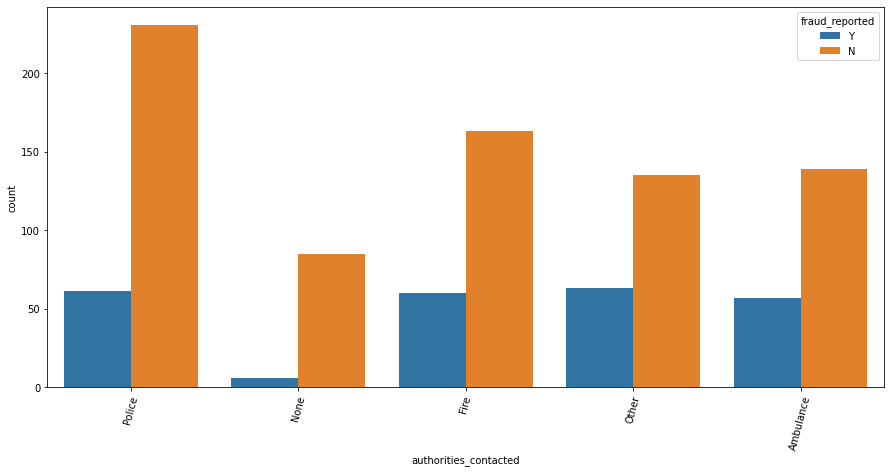

In [27]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["authorities_contacted"],hue=df["fraud_reported"])

So all the departments have equal Fraud reported 

<AxesSubplot:xlabel='incident_state', ylabel='count'>

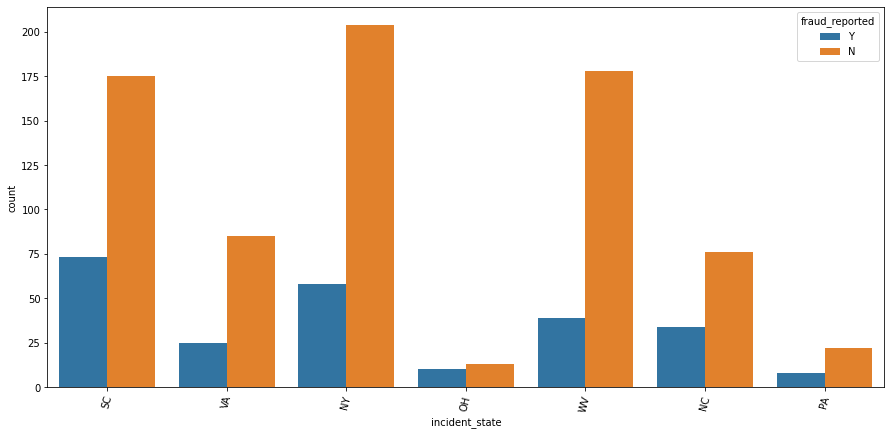

In [28]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["incident_state"],hue=df["fraud_reported"])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

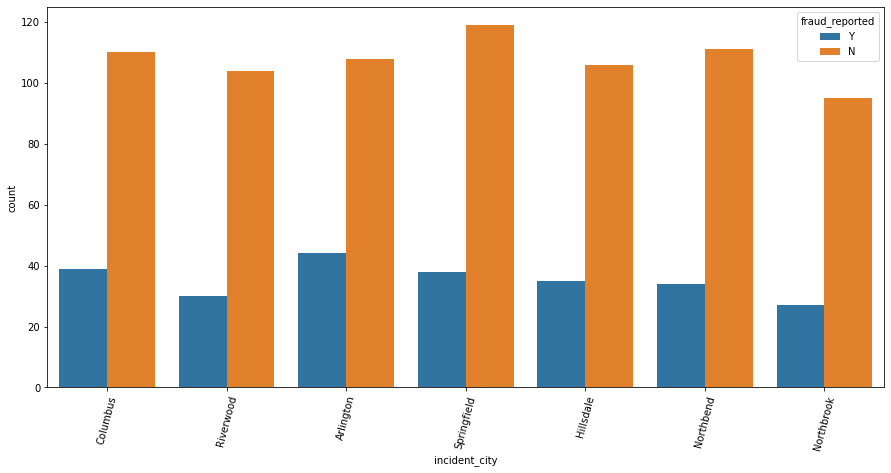

In [29]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["incident_city"],hue=df["fraud_reported"])

So most of the cities the fraud reported are almost equal

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

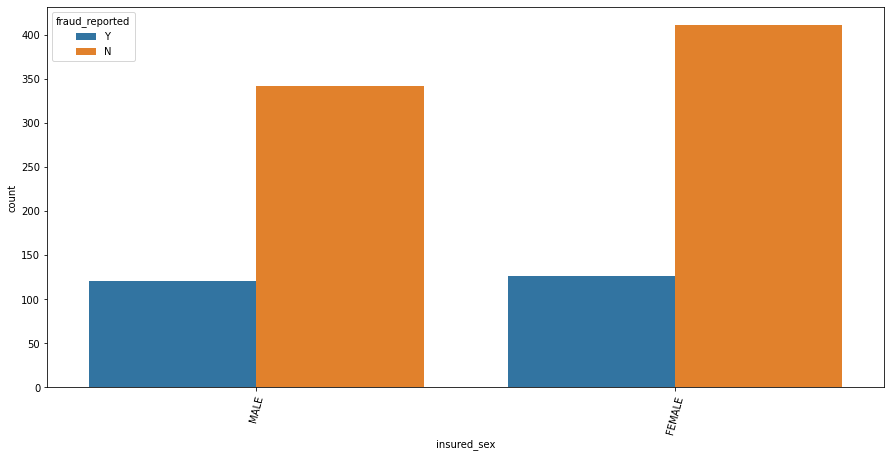

In [30]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["insured_sex"],hue=df["fraud_reported"])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

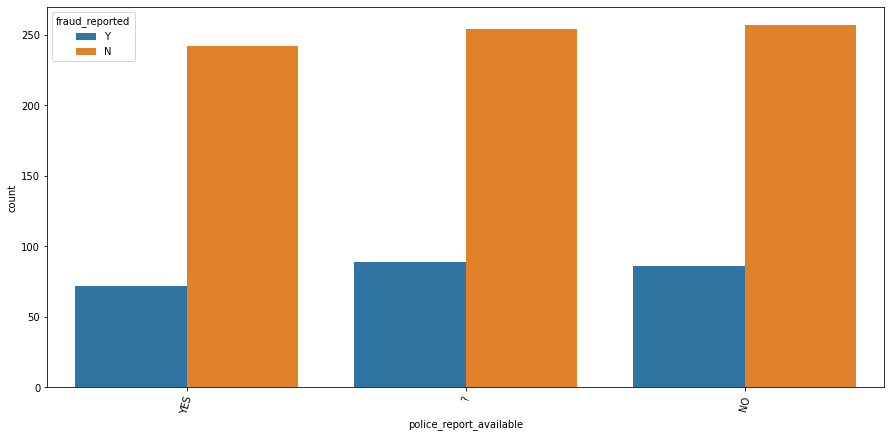

In [31]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
sns.countplot(df["police_report_available"],hue=df["fraud_reported"])

In this column also there are ? avaiable So we will there it So in vaues Yes and No of police report avilable there are equal number fraud reported 

## Handling ? (Question Mark)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

So Now we will treate ? which are present in this dataset

In [33]:
df.replace("?", np.nan, inplace = True) # So there have converted all the question marks to NAN

In [34]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

So now we have converted ? to NAN there are three columns collision_type , property_damage ,police_report_available which contains NAN so will treate them 

In [35]:
df["collision_type"].replace(np.nan, "Rear Collision", inplace = True)

In [36]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [37]:
df["property_damage"].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [38]:
df["police_report_available"].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [39]:
df["police_report_available"].replace(np.nan, "NO", inplace = True)

In [40]:
df["property_damage"].replace(np.nan, "NO", inplace = True)

In [41]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Now we have handeled ? 

## Encoding The Target column

In [42]:
fraud_dumm=pd.get_dummies(df["fraud_reported"],drop_first=True)

In [43]:
df=pd.concat([df,fraud_dumm],axis=1)

In [44]:
df=df.drop(["fraud_reported"],axis=1)

In [45]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Y
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [46]:
df["umbrella_limit"]

0            0
1      5000000
2      5000000
3      6000000
4      6000000
        ...   
995          0
996          0
997    3000000
998    5000000
999          0
Name: umbrella_limit, Length: 1000, dtype: int64

## Feature Engineering

In [47]:
df=df.drop(["policy_number","insured_zip","policy_csl"],axis=1)

In [48]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Y
0,328,48,17-10-2014,OH,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,27-06-2006,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,06-09-2000,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,25-05-1990,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,06-06-2014,IL,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [50]:
df["policy_bind_date"]

0      17-10-2014
1      27-06-2006
2      06-09-2000
3      25-05-1990
4      06-06-2014
          ...    
995    16-07-1991
996    05-01-2014
997    17-02-2003
998    18-11-2011
999    11-11-1996
Name: policy_bind_date, Length: 1000, dtype: object

## Handling Date and Categorical data Column

In [51]:
df["policy_bind_Day"] = df["policy_bind_date"].apply(lambda x:x.split("-")[0])
df["policy_bind_month"] = df["policy_bind_date"].apply(lambda x:x.split("-")[1])
df["policy_bind_year"] = df["policy_bind_date"].apply(lambda x:x.split("-")[2])

In [52]:
df["policy_bind_Day"]=df["policy_bind_Day"].astype(int)
df["policy_bind_month"]=df["policy_bind_month"].astype(int)
df["policy_bind_year"]=df["policy_bind_year"].astype(int)

In [53]:
df.drop("policy_bind_date",axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_date      

In [55]:
df["incident_date"]

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object

In [56]:
df["incident_Day"] = df["incident_date"].apply(lambda x:x.split("-")[0])
df["incident_month"] = df["incident_date"].apply(lambda x:x.split("-")[1])
df["incident_year"] = df["incident_date"].apply(lambda x:x.split("-")[2])

In [57]:
df["incident_Day"]=df["incident_Day"].astype(int)
df["incident_month"]=df["incident_month"].astype(int)
df["incident_year"]=df["incident_year"].astype(int)

In [58]:
df.drop("incident_date",axis=1,inplace=True)


In [59]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_make,auto_model,auto_year,Y,policy_bind_Day,policy_bind_month,policy_bind_year,incident_Day,incident_month,incident_year
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,Saab,92x,2004,1,17,10,2014,25,1,2015
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,Mercedes,E400,2007,1,27,6,2006,21,1,2015
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,Dodge,RAM,2007,0,6,9,2000,22,2,2015
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,Chevrolet,Tahoe,2014,1,25,5,1990,10,1,2015
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,Accura,RSX,2009,0,6,6,2014,17,2,2015


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [61]:
df["policy_bind_month"]

0      10
1       6
2       9
3       5
4       6
       ..
995     7
996     1
997     2
998    11
999    11
Name: policy_bind_month, Length: 1000, dtype: int32

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
for column in df.columns:
    if df[column].dtype==np.object :
        df[column]=LabelEncoder().fit_transform(df[column])
    else:
        continue


In [64]:
df["policy_bind_month"]

0      10
1       6
2       9
3       5
4       6
       ..
995     7
996     1
997     2
998    11
999    11
Name: policy_bind_month, Length: 1000, dtype: int32

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

So we have handeled all the categorical columns and Date Columns

In [66]:
df.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
Y                              1.175051
property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
incident_severity              0.279016
incident_month                 0.267378
injury_claim                   0.264811
insured_sex                    0.148630
incident_type                  0.101507
insured_relationship           0.077488
policy_bind_Day                0.053237
policy_bind_year               0.052511
incident_city                  0.049531
incident_Day                   0.039711
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
incident_year                  0.000000
incident_location              0.000000


In [67]:
## Checking the Outliers

In [68]:
collist=df.columns.values

In [69]:
ncol=7
nrow=7
plt.figure(figsize=(5*nrow,6*ncol),dpi=300)
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient="v")

## Removing the outliers 

In [70]:
#1st quantile
q1=df.quantile(0.25)

In [71]:
#3rd quantile
q3=df.quantile(0.75)


In [72]:
#IQR
IQR=q3-q1

In [73]:
umbrella_limit_high=q3.umbrella_limit+1.5*IQR.umbrella_limit

In [74]:
umbrella_limit_high

0.0

In [75]:
index=np.where(df['umbrella_limit']>umbrella_limit_high)
index

(array([  1,   2,   3,   4,  10,  12,  16,  17,  20,  27,  31,  35,  47,
         48,  50,  64,  66,  78,  81,  82,  86,  88,  90,  91,  95, 111,
        115, 119, 120, 121, 125, 129, 143, 146, 154, 157, 161, 173, 175,
        179, 182, 183, 184, 185, 188, 194, 202, 208, 212, 214, 219, 223,
        226, 231, 236, 247, 251, 255, 262, 263, 279, 283, 286, 289, 301,
        303, 306, 308, 314, 329, 334, 335, 336, 344, 346, 347, 349, 352,
        360, 366, 373, 374, 375, 377, 380, 388, 389, 391, 394, 396, 399,
        405, 415, 419, 427, 430, 437, 444, 446, 450, 458, 465, 468, 471,
        474, 480, 491, 496, 503, 504, 505, 519, 526, 530, 540, 541, 557,
        561, 566, 569, 570, 574, 583, 597, 598, 599, 603, 607, 619, 626,
        631, 639, 644, 653, 654, 656, 657, 658, 662, 663, 664, 665, 674,
        675, 681, 683, 686, 690, 696, 700, 713, 715, 717, 728, 734, 741,
        743, 750, 761, 762, 791, 794, 795, 796, 798, 802, 812, 813, 830,
        835, 848, 849, 868, 875, 877, 879, 887, 901

In [76]:
df.drop("umbrella_limit",axis=1,inplace=True) ## Since it contain most number of outliers we we ill drop it 

In [77]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,Y,policy_bind_Day,policy_bind_month,policy_bind_year,incident_Day,incident_month,incident_year
0,328,48,2,1000,1406.91,1,4,2,17,0,...,10,1,2004,1,17,10,2014,25,1,2015
1,228,42,1,2000,1197.22,1,4,6,15,2,...,8,12,2007,1,27,6,2006,21,1,2015
2,134,29,2,2000,1413.14,0,6,11,2,3,...,4,30,2007,0,6,9,2000,22,2,2015
3,256,41,0,2000,1415.74,0,6,1,2,4,...,3,34,2014,1,25,5,1990,10,1,2015
4,228,44,0,1000,1583.91,1,0,11,2,4,...,0,31,2009,0,6,6,2014,17,2,2015


## Checking the Correlation

In [78]:
corr_=df.corr()

<AxesSubplot:>

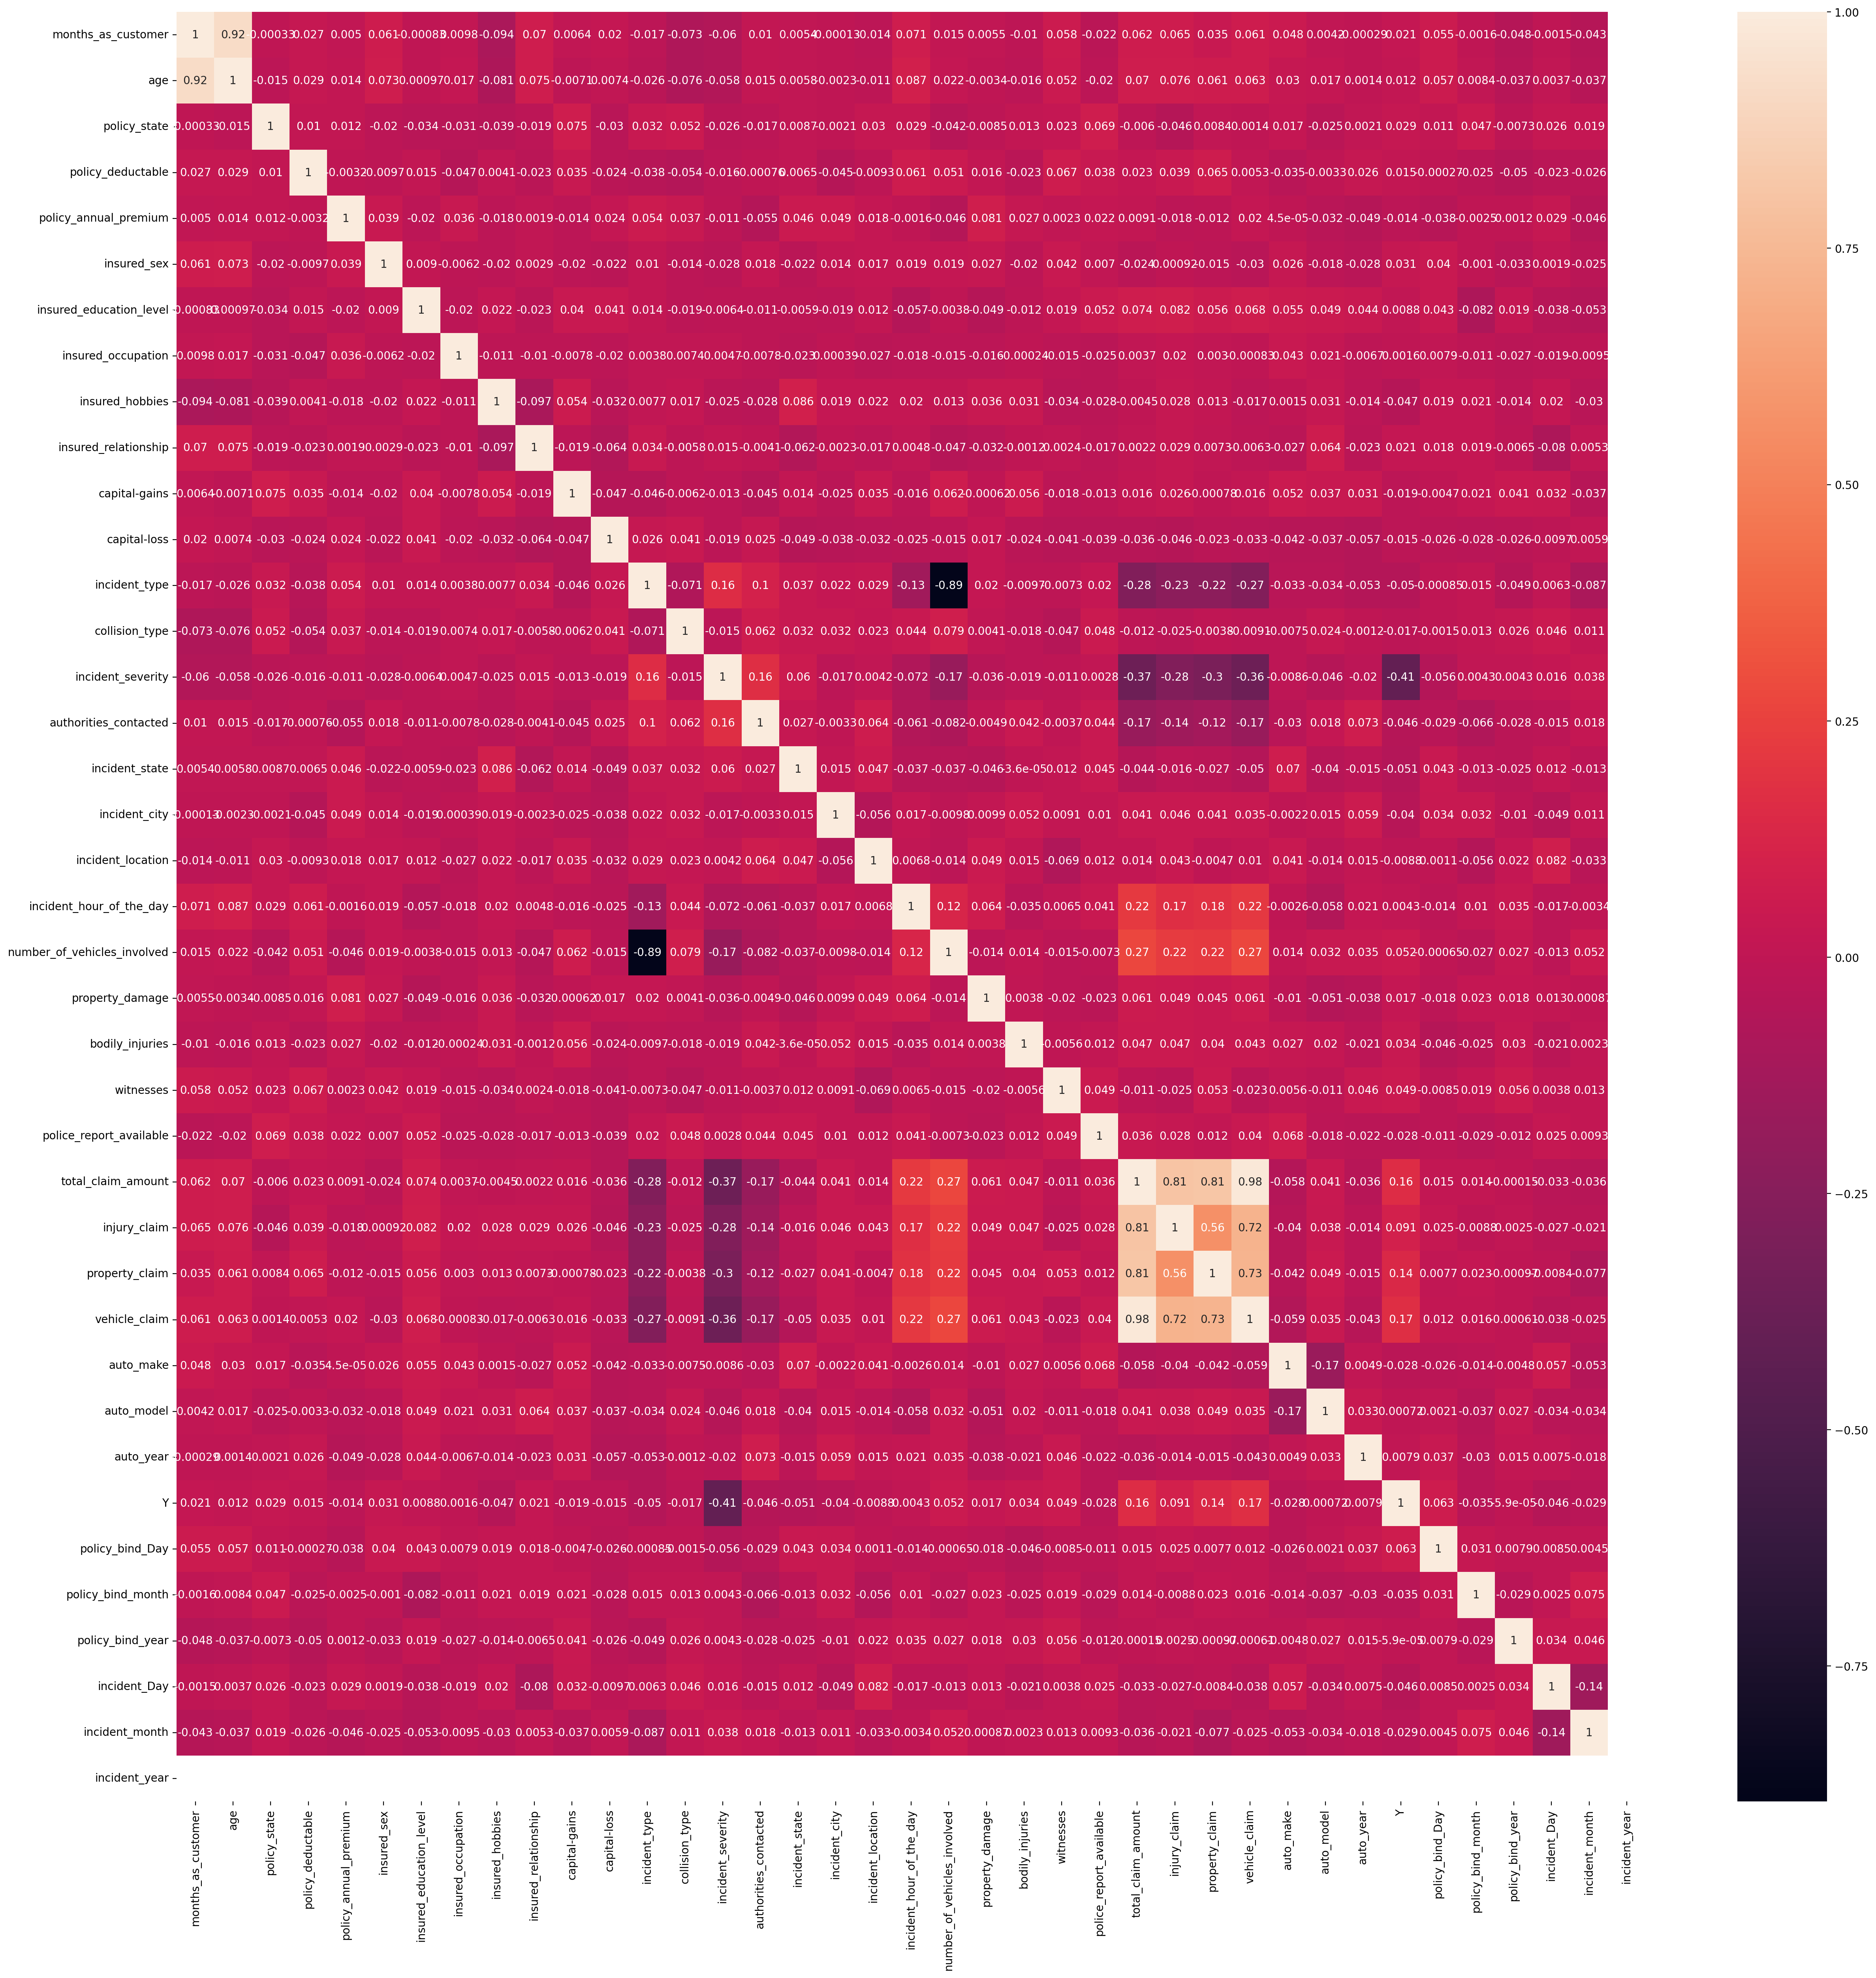

In [79]:
plt.figure(figsize=(30,30),dpi=200)
sns.heatmap(data=corr_,annot=True)

In [80]:
X=df.drop("Y",axis=1)

In [81]:
y=df["Y"]

In [82]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Y, dtype: uint8

## Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [84]:
X_scalar=scalar.fit_transform(X)

## Train Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
 X_train, X_test, y_train, y_test = train_test_split(X_scalar, y, test_size=0.33, random_state=42)

In [87]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (670, 38)
Number transactions y_train dataset:  (670,)
Number transactions X_test dataset:  (330, 38)
Number transactions y_test dataset:  (330,)


## Treating the Imbalanced Data by using Smote

In [88]:
df["Y"].value_counts()

0    753
1    247
Name: Y, dtype: int64

In [89]:

# check version number
import imblearn
print(imblearn.__version__)

0.9.0


In [90]:
from imblearn.over_sampling import SMOTE


In [91]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 159
Before OverSampling, counts of label '0': 511 



In [92]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

After OverSampling, the shape of train_X: (1022, 38)
After OverSampling, the shape of train_y: (1022,) 

After OverSampling, counts of label '1': 511
After OverSampling, counts of label '0': 511


## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
Logi_reg=LogisticRegression()

In [95]:
Logi_reg.fit(X_res,y_res)

LogisticRegression()

In [96]:
y_pred=Logi_reg.predict(X_test)

## Logistic Regression Model Evaluation

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [98]:
confusion_matrix(y_test, y_pred)

array([[160,  82],
       [ 23,  65]], dtype=int64)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       242
           1       0.44      0.74      0.55        88

    accuracy                           0.68       330
   macro avg       0.66      0.70      0.65       330
weighted avg       0.76      0.68      0.70       330



In [100]:
logi_accuracy=accuracy_score(y_test, y_pred)

In [101]:
logi_accuracy

0.6818181818181818

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cross_val_score(Logi_reg,X_scalar,y,cv=5).mean()

0.774

## Hyperparmater Tuning of Logistic Regression

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [106]:
clf = GridSearchCV(Logi_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [107]:
clf = GridSearchCV(Logi_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [108]:
#clf.fit(X_res,y_res)

In [109]:
#clf.best_params_

In [110]:
Logi_reg_CV=LogisticRegression(C=0.012742749857031334,max_iter=100,penalty="l1",solver='saga')

In [111]:
Logi_reg_CV.fit(X_res,y_res)

LogisticRegression(C=0.012742749857031334, penalty='l1', solver='saga')

In [112]:
y_pred_CV=Logi_reg_CV.predict(X_test)

In [113]:
confusion_matrix(y_test, y_pred_CV)

array([[202,  40],
       [ 29,  59]], dtype=int64)

In [114]:
print(classification_report(y_test, y_pred_CV))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       242
           1       0.60      0.67      0.63        88

    accuracy                           0.79       330
   macro avg       0.74      0.75      0.74       330
weighted avg       0.80      0.79      0.79       330



In [115]:
logi_accuracy_CV=accuracy_score(y_test, y_pred_CV)

In [116]:
logi_accuracy_CV

0.7909090909090909

# Random Forest Classfier 

In [117]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [118]:
model.fit(X_res,y_res)

RandomForestClassifier()

In [119]:
y_pred_Ran=model.predict(X_test)

## Model Evaluation

In [120]:
y_pred_Ran=model.predict(X_test)

In [121]:
confusion_matrix(y_test,y_pred_Ran)

array([[211,  31],
       [ 41,  47]], dtype=int64)

In [122]:
print(classification_report(y_test,y_pred_Ran))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       242
           1       0.60      0.53      0.57        88

    accuracy                           0.78       330
   macro avg       0.72      0.70      0.71       330
weighted avg       0.77      0.78      0.78       330



In [123]:
model_acc=accuracy_score(y_test,y_pred_Ran)

In [124]:
model_acc

0.7818181818181819

## Hyperparmaeter tuning of Random forest 

In [125]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
max_features=["auto","sqrt"]
bootstrap=[True,False]
min_samples_leaf = [1, 2, 5, 10] 

In [126]:
param_grid ={"n_estimators":n_estimators,
              "max_depth": max_depth,  
              "min_samples_split":min_samples_split, 
             "min_samples_leaf":min_samples_leaf, 
             "bootstrap":bootstrap, 
            "max_features":max_features}

print(param_grid)

{'n_estimators': [100, 300, 500, 800, 1200], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']}


In [127]:
rf_grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)

In [128]:
#rf_grid.fit(X_res,y_res)

In [129]:
#rf_grid.best_params_

In [130]:
model_CV=RandomForestClassifier(n_estimators=100,max_depth=15, min_samples_split=2,min_samples_leaf=1,bootstrap=False,max_features='auto')

In [131]:
model_CV.fit(X_res,y_res)

RandomForestClassifier(bootstrap=False, max_depth=15)

## Model Evaluation  

In [132]:
y_pred_Ran_CV=model_CV.predict(X_test)

In [133]:
acc_score_ran=accuracy_score(y_test,y_pred_Ran_CV)

In [134]:
acc_score_ran

0.7575757575757576

In [135]:
confusion_matrix(y_test,y_pred_Ran_CV)

array([[216,  26],
       [ 54,  34]], dtype=int64)

In [136]:
print(classification_report(y_test,y_pred_Ran_CV))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       242
           1       0.57      0.39      0.46        88

    accuracy                           0.76       330
   macro avg       0.68      0.64      0.65       330
weighted avg       0.74      0.76      0.74       330



## Decision tree 

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dtc_model=DecisionTreeClassifier()

In [139]:
dtc_model.fit(X_res,y_res)

DecisionTreeClassifier()

In [140]:
y_pred_dc=dtc_model.predict(X_test)

## Model Evaluation

In [141]:
confusion_matrix(y_test,y_pred_dc)

array([[206,  36],
       [ 43,  45]], dtype=int64)

In [142]:
acc_score_dc=accuracy_score(y_test,y_pred_dc)

In [143]:
acc_score_dc

0.7606060606060606

In [144]:
print(classification_report(y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       242
           1       0.56      0.51      0.53        88

    accuracy                           0.76       330
   macro avg       0.69      0.68      0.69       330
weighted avg       0.75      0.76      0.76       330



In [145]:
## Hyperparameter tuning of Decision tree

In [146]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [147]:
grid_search_dc = GridSearchCV(estimator=dtc_model, param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [148]:
grid_search_dc.fit(X_res,y_res)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [149]:
grid_search_dc.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [150]:
dtc_model_CV=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10,criterion='entropy')

In [151]:
dtc_model_CV.fit(X_res,y_res)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

## Model Evaluation

In [156]:
y_pred_dc_cv=dtc_model_CV.predict(X_test)

In [157]:
acc_score_dc_cv=accuracy_score(y_test,y_pred_dc_cv)

In [158]:
acc_score_dc_cv

0.8333333333333334

In [159]:
print(classification_report(y_test,y_pred_dc_cv))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       242
           1       0.64      0.85      0.73        88

    accuracy                           0.83       330
   macro avg       0.79      0.84      0.81       330
weighted avg       0.86      0.83      0.84       330



Accuracy has improved after hyperparameter tuning but still less than Random forest and Logistic regression 

## Auc and Roc Curves to select the best model

In [161]:
from sklearn.metrics import roc_curve,auc

Text(0.5, 1.0, 'Logistic Regression Without Hyperparmeter tuning')

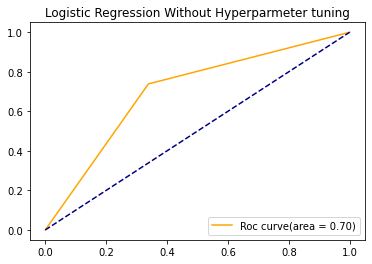

In [162]:
#For logistic Regression without Hyperparmeter tuning
fpr,tpr,thesholds=roc_curve(y_test, y_pred)
roc_auc=auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color='orange',label='Roc curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--' )
plt.legend(loc='lower right')
plt.title("Logistic Regression Without Hyperparmeter tuning")

Text(0.5, 1.0, 'Logistic Regression With Hyperparmeter tuning')

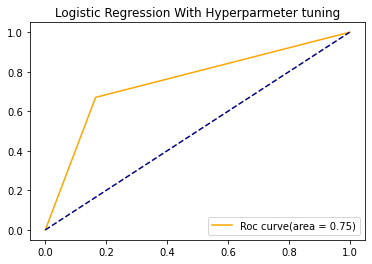

In [163]:
#For logistic Regression with Hyperparmeter tuning
fpr,tpr,thesholds=roc_curve(y_test, y_pred_CV)
roc_auc=auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color='orange',label='Roc curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--' )
plt.legend(loc='lower right')
plt.title("Logistic Regression With Hyperparmeter tuning")

Text(0.5, 1.0, 'Random forest Without Hyperparmeter tuning')

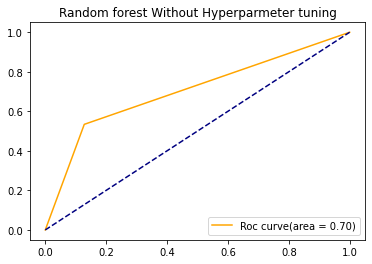

In [164]:
#For Random Forest without Hyperparmeter tuning
fpr,tpr,thesholds=roc_curve(y_test,y_pred_Ran)
roc_auc=auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color='orange',label='Roc curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--' )
plt.legend(loc='lower right')
plt.title("Random forest Without Hyperparmeter tuning")

Text(0.5, 1.0, 'Random forest With Hyperparmeter tuning')

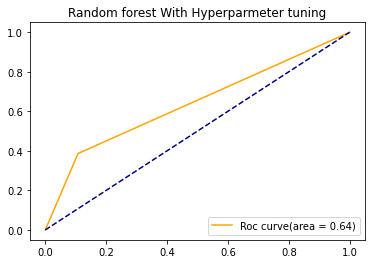

In [165]:
#For Random Forest with Hyperparmeter tuning
fpr,tpr,thesholds=roc_curve(y_test,y_pred_Ran_CV)
roc_auc=auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color='orange',label='Roc curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--' )
plt.legend(loc='lower right')
plt.title("Random forest With Hyperparmeter tuning")

Text(0.5, 1.0, 'Decision tree Without Hyperparmeter tuning')

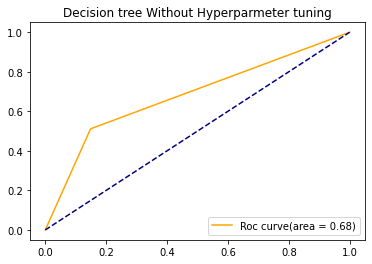

In [166]:
#For Decision tree without Hyperparmeter tuning
fpr,tpr,thesholds=roc_curve(y_test,y_pred_dc)
roc_auc=auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color='orange',label='Roc curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--' )
plt.legend(loc='lower right')
plt.title("Decision tree Without Hyperparmeter tuning")

Text(0.5, 1.0, 'Decision tree With Hyperparmeter tuning')

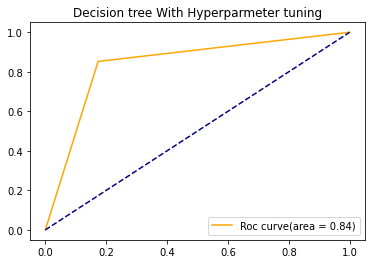

In [167]:
#For Decision tree with Hyperparmeter tuning
fpr,tpr,thesholds=roc_curve(y_test,y_pred_dc_cv)
roc_auc=auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color='orange',label='Roc curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--' )
plt.legend(loc='lower right')
plt.title("Decision tree With Hyperparmeter tuning")

By this we can understand that Decision tree with hyperparameter tuning is performing well 

## Saving the model for future use

In [170]:
import joblib
joblib.dump(dtc_model_CV, "Insurance_claim.pkl")

['Insurance_claim.pkl']